# Feature Selection and Data Visualization

https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization/notebook 

In this data analysis report, we focus on various methods of feature visualization and selection only. Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. Apart from these, principle component analysis and t-distributed Stochastic Neighbor Embedding (t-SNE) are also used to observe number of important components.

![flow.png](images/flow.png)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
                                                                                                                                                                                                                                                                                                                            
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
pd.options.display.max_columns = 40

In [4]:
sns.set(context='notebook', style="whitegrid")

In [5]:
np.random.seed(42)
random_state = 42

In [6]:
cancer_df = pd.read_csv('data/data.csv')

Before making any further progress towards feature selection,feature extraction and classification, firstly we start with basic data analysis. Let's look at features of data.

In [7]:
cancer_df.head()  # head method shows only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**There are 2 things that take our attention**

1) There is an **id** columns that cannot be used for classificaiton.

2) Diagnosis is our class label.

Therefore, drop these unnecessary features. However do not forget this is not a feature selection. This is like a browse a pub, we do not choose our drink yet !!!

In [8]:
# feature names as a list
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
# y includes our labels and x includes our features
y = cancer_df['diagnosis']    # M or B

In [10]:
X = cancer_df.drop(['id','diagnosis'], axis = 1)

In [11]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


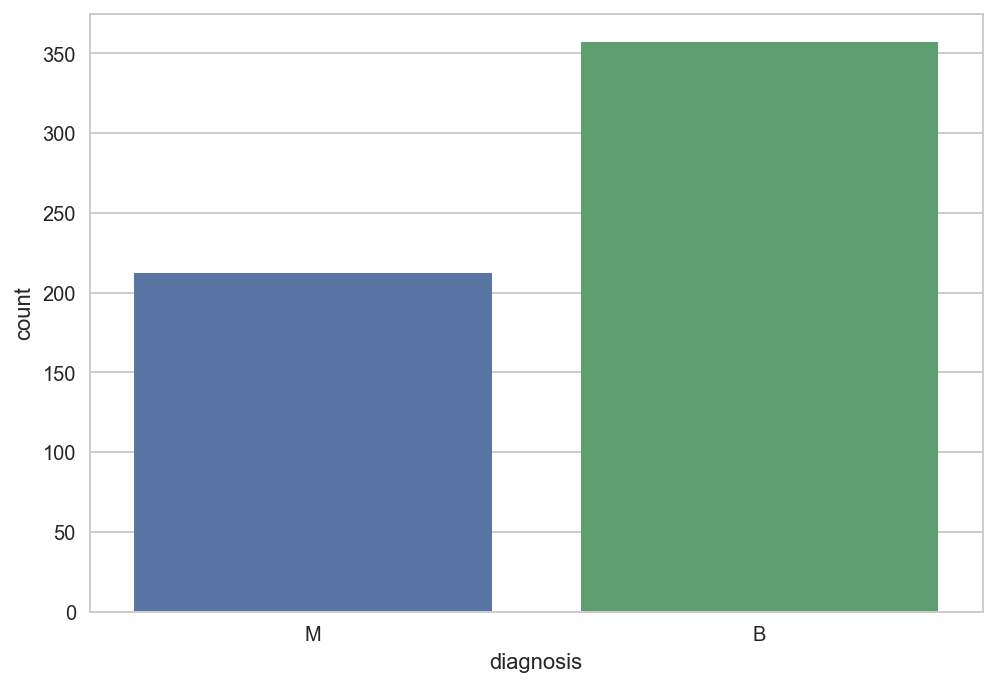

In [12]:
sns.countplot(y, label="Count");  # M = 212, B = 357

In [13]:
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


Okey, now we have features but **what does they mean** or actually **how much do we need to know about these features**. The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standard deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on in the dataset.

In [14]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Insights: the **area_mean** feature's max value is 2501 and **smoothness_mean** features' max 0.16340. Therefore **we  need to do standardization or normalization before visualization, feature selection, feature extraction or classification**.

### Visualization

In order to visualizate data we are going to use seaborn plots. Here we are not selecting feature, but we are trying to know about the data; it's like looking at the drink list at the pub door.

Before plotting any kind of data distribution for comparison between features we need to do normalization or standardization. Because differences between values of features are very high to observe on the plot.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [16]:
scaled_df = pd.concat([pd.DataFrame(X_std, columns=X.columns), y], axis=1)

In [17]:
scaled_df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,-0.321304,-0.289258,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802,M
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,0.155410,0.298627,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730,M
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.490051,0.233722,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435,M
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650,M
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,-0.409420,-0.360764,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856,M


In [18]:
melt_df = pd.melt(scaled_df, id_vars='diagnosis', var_name='features', value_name='value')
melt_df.sample(10, random_state=random_state)

,diagnosis,features,value
3070,B,compactness_mean,-0.532555
6621,B,texture_se,0.123641
12738,B,perimeter_worst,-0.224919
16667,B,fractal_dimension_worst,-0.385462
7555,B,area_se,-0.595962
4580,M,symmetry_mean,0.417600
10565,M,symmetry_se,0.864222
13038,B,perimeter_worst,-1.174194
10486,M,symmetry_se,0.159545
12439,B,texture_worst,1.027997


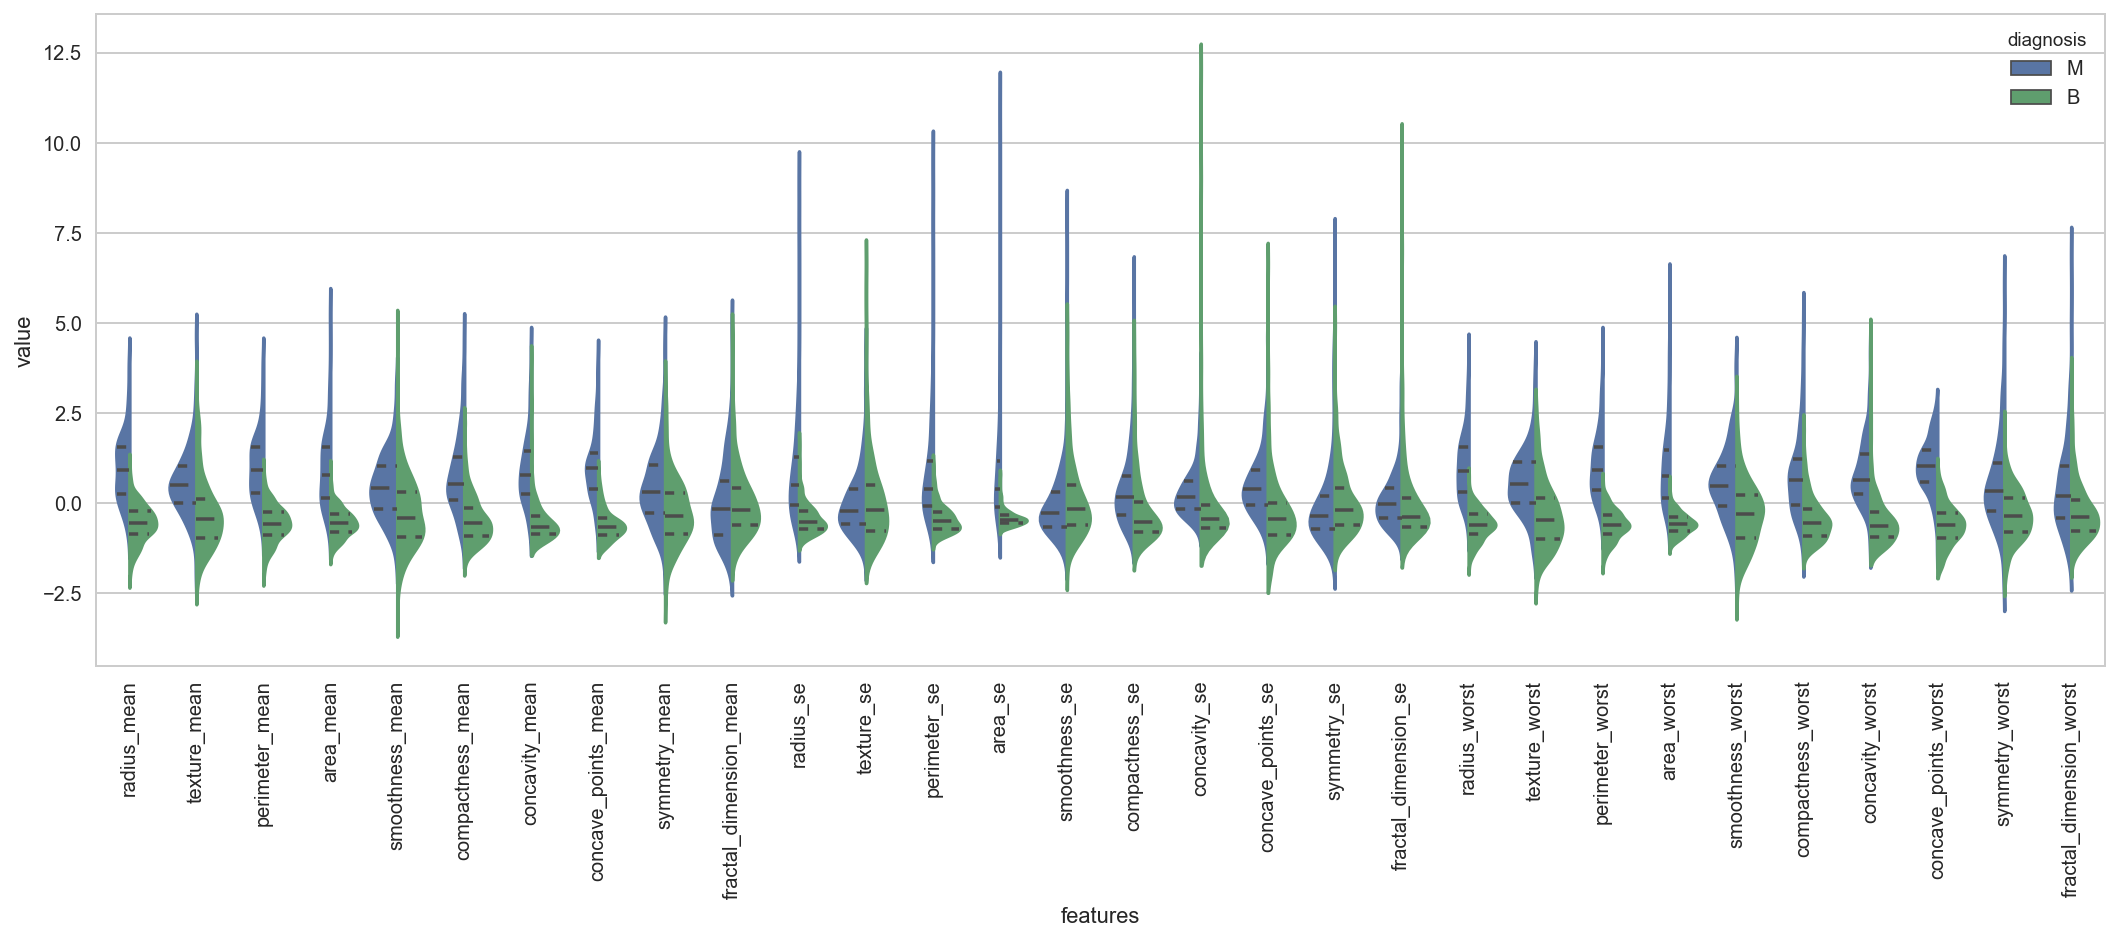

In [19]:
plt.figure(figsize=(18,6))
sns.violinplot(x='features', y='value', hue='diagnosis', data=melt_df, split=True, inner='quart')
plt.xticks(rotation=90);

Let's interpret the plot above together. For example, in **texture_mean** feature, median of the Malignant and Benign looks quite separated so it can be a good feature for classification. However, in **fractal_dimension_mean** feature, median of the Malignant and Benign does not look like being separated well so it does not provide good information for classification.

Lets interpret one more thing about plot above, variable of **concavity_worst** and **concave points_worst** looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

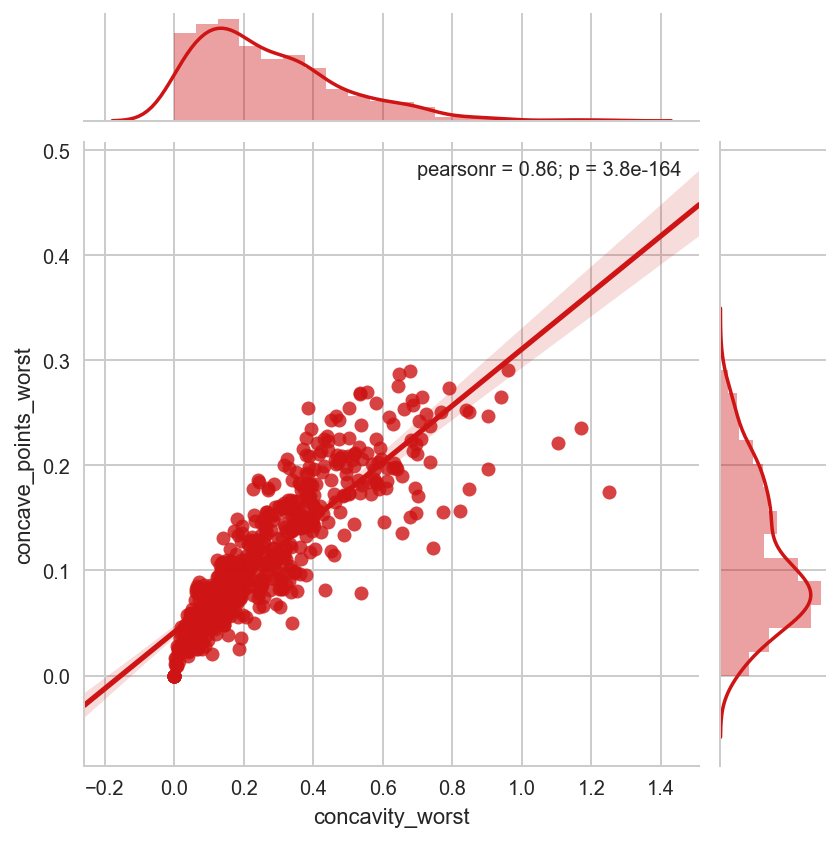

In [20]:
sns.jointplot(X['concavity_worst'], X['concave_points_worst'], kind='reg', color="#ce1414");

What about three or more feature comparision? For this purpose we can use pair grid plot. Also it seems very cool :) We  discover that **radius_worst**, **perimeter_worst** and **area_worst** are correlated as it can be seen in the pair grid plot. We will definitely use these discoveries for feature selection.

D:\Work\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


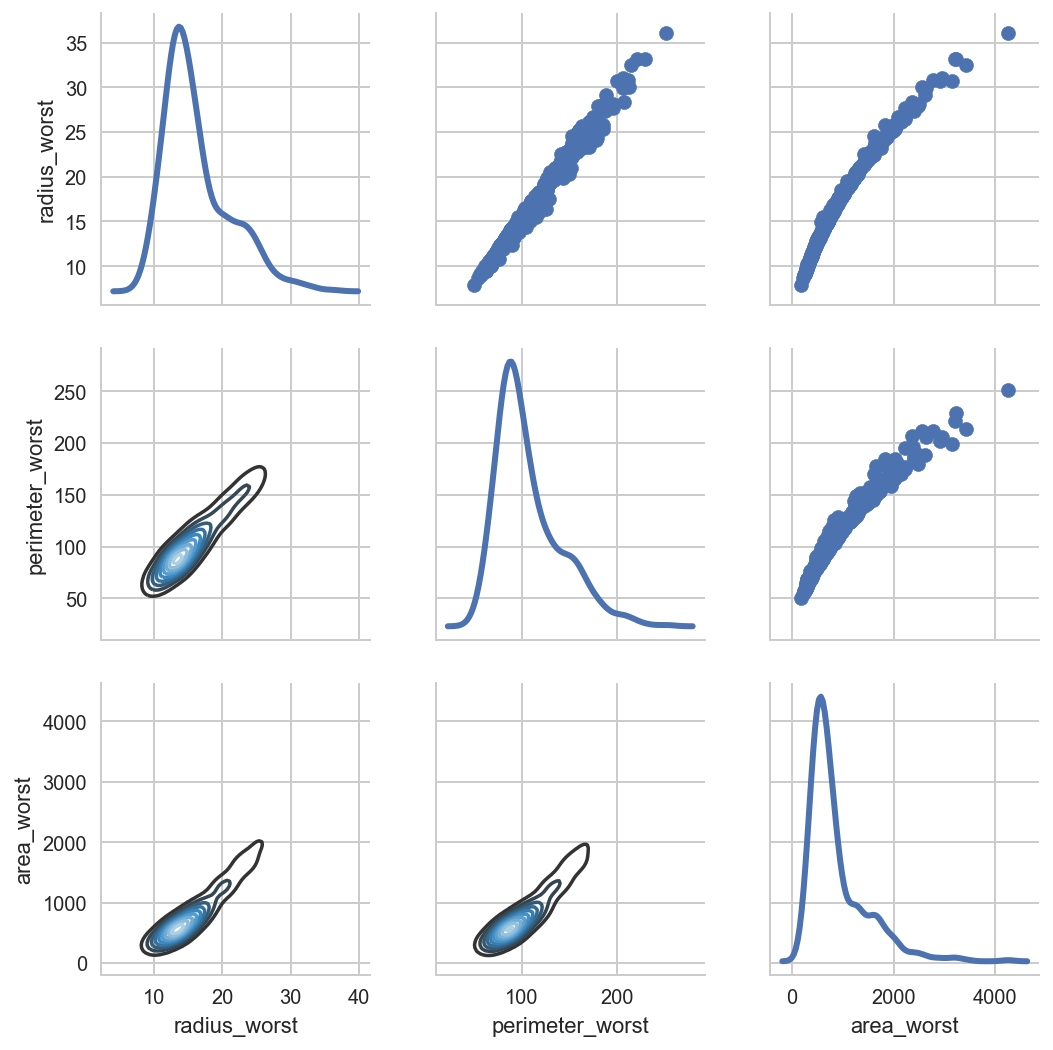

In [21]:
g = sns.PairGrid(X[['radius_worst','perimeter_worst','area_worst']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Up to this point, we make some comments and discoveries on data already. We can then use a strip plot that will open the pub's door :)

In [22]:
y = cancer_df['diagnosis']
X = cancer_df.drop(['id','diagnosis'], axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

scaled_df = pd.concat([pd.DataFrame(X_std, columns=X.columns), y], axis=1)
melt_df = pd.melt(scaled_df, id_vars='diagnosis', var_name='features', value_name='value')

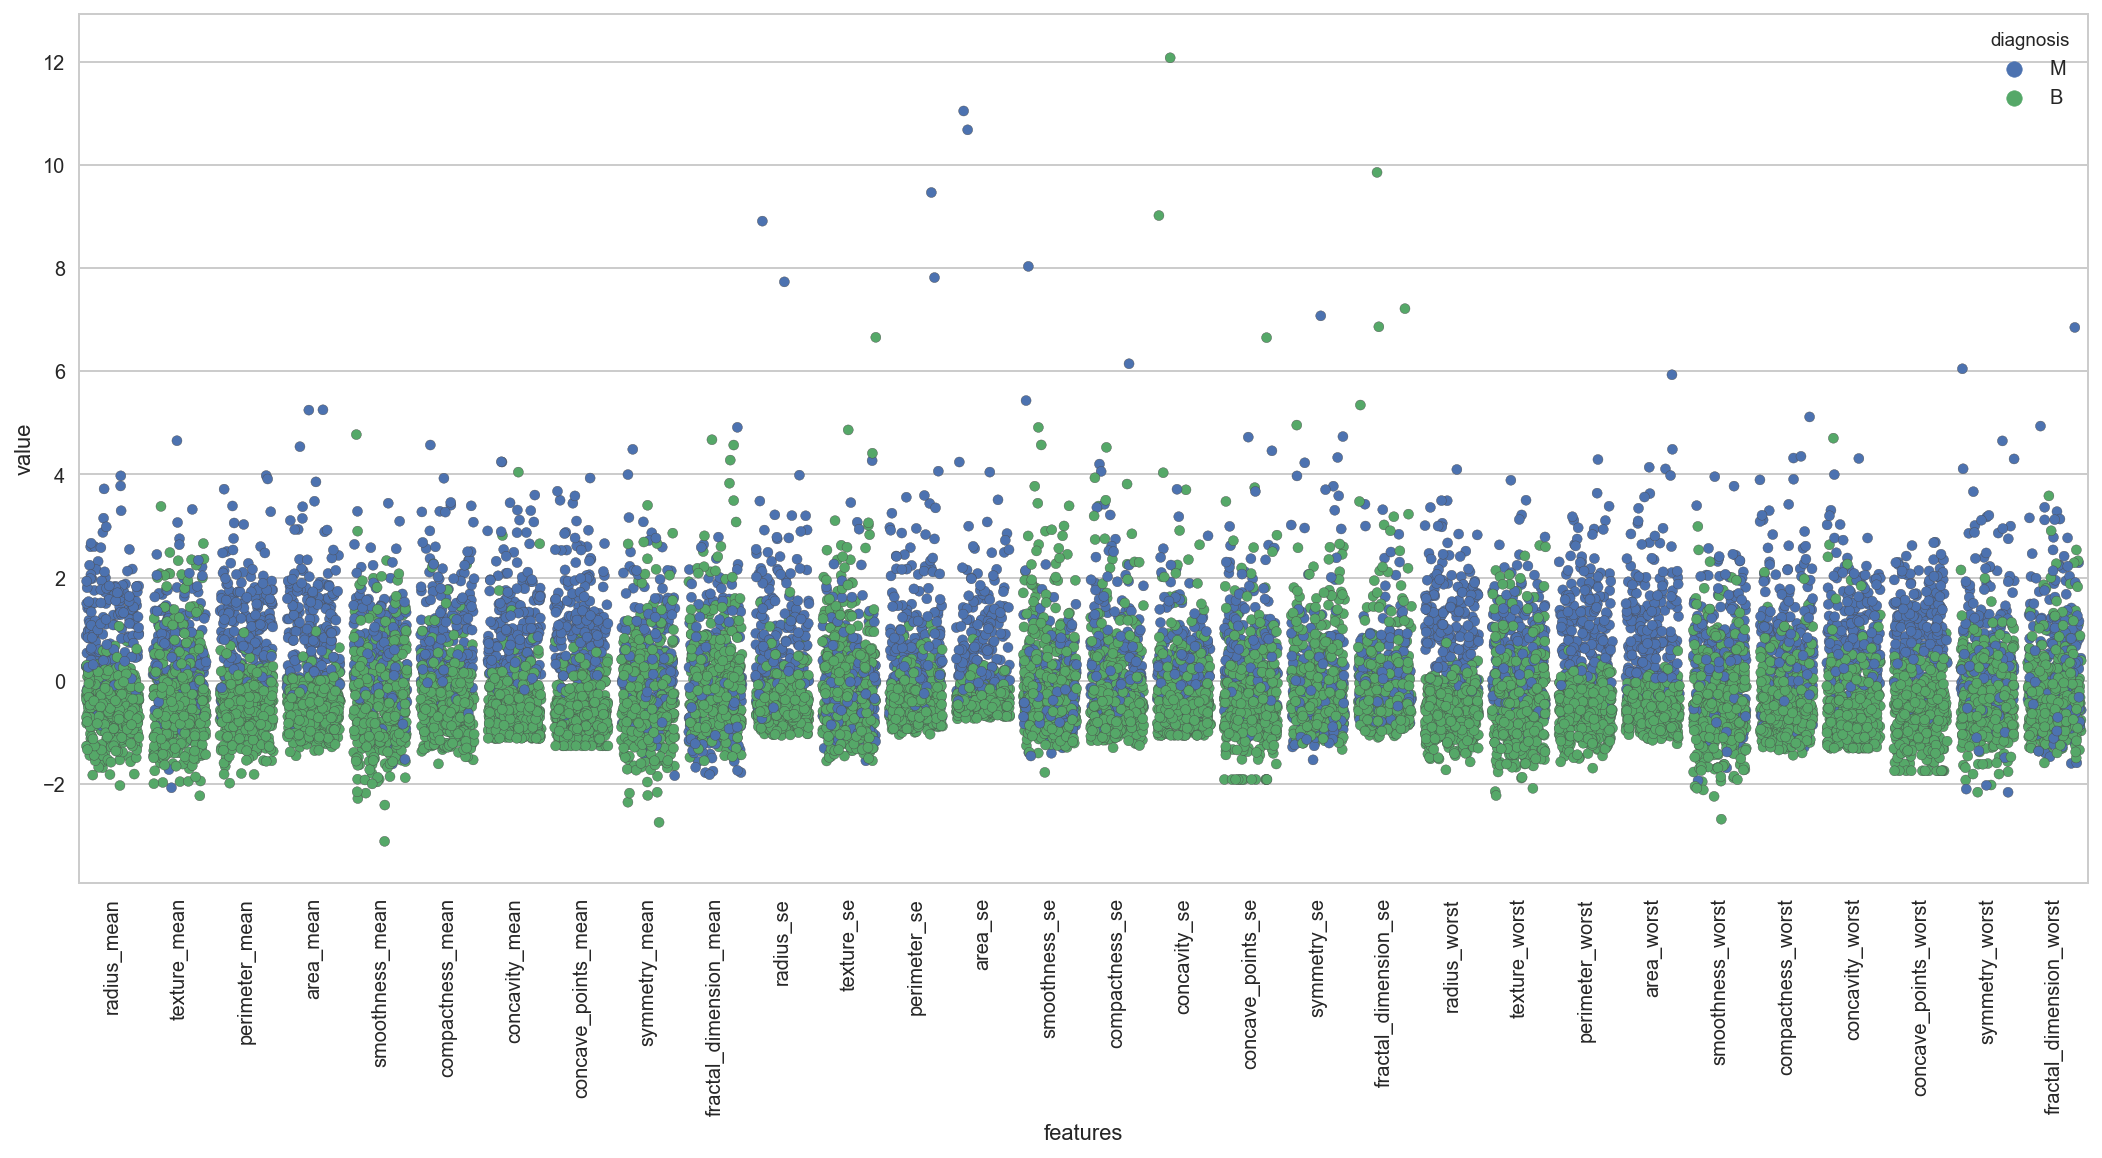

In [23]:
plt.figure(figsize=(18,8))
sns.stripplot(x="features", y="value", hue="diagnosis", data=melt_df, jitter=0.4, linewidth=0.2)
plt.xticks(rotation=90);

They look cool right. And we can see variance more clear. **In these three plots which feature looks like more clear in terms of classification?** **area_worst** in last strip plot looks like malignant and benign are separated not totaly but mostly. Hovewer, **smoothness_se** in strip plot looks like malignant and benign are mixed so it is hard to classfy while using this feature.

**What if we want to observe all correlation between features?** We can use a heatmap that is old but powerful plot method.

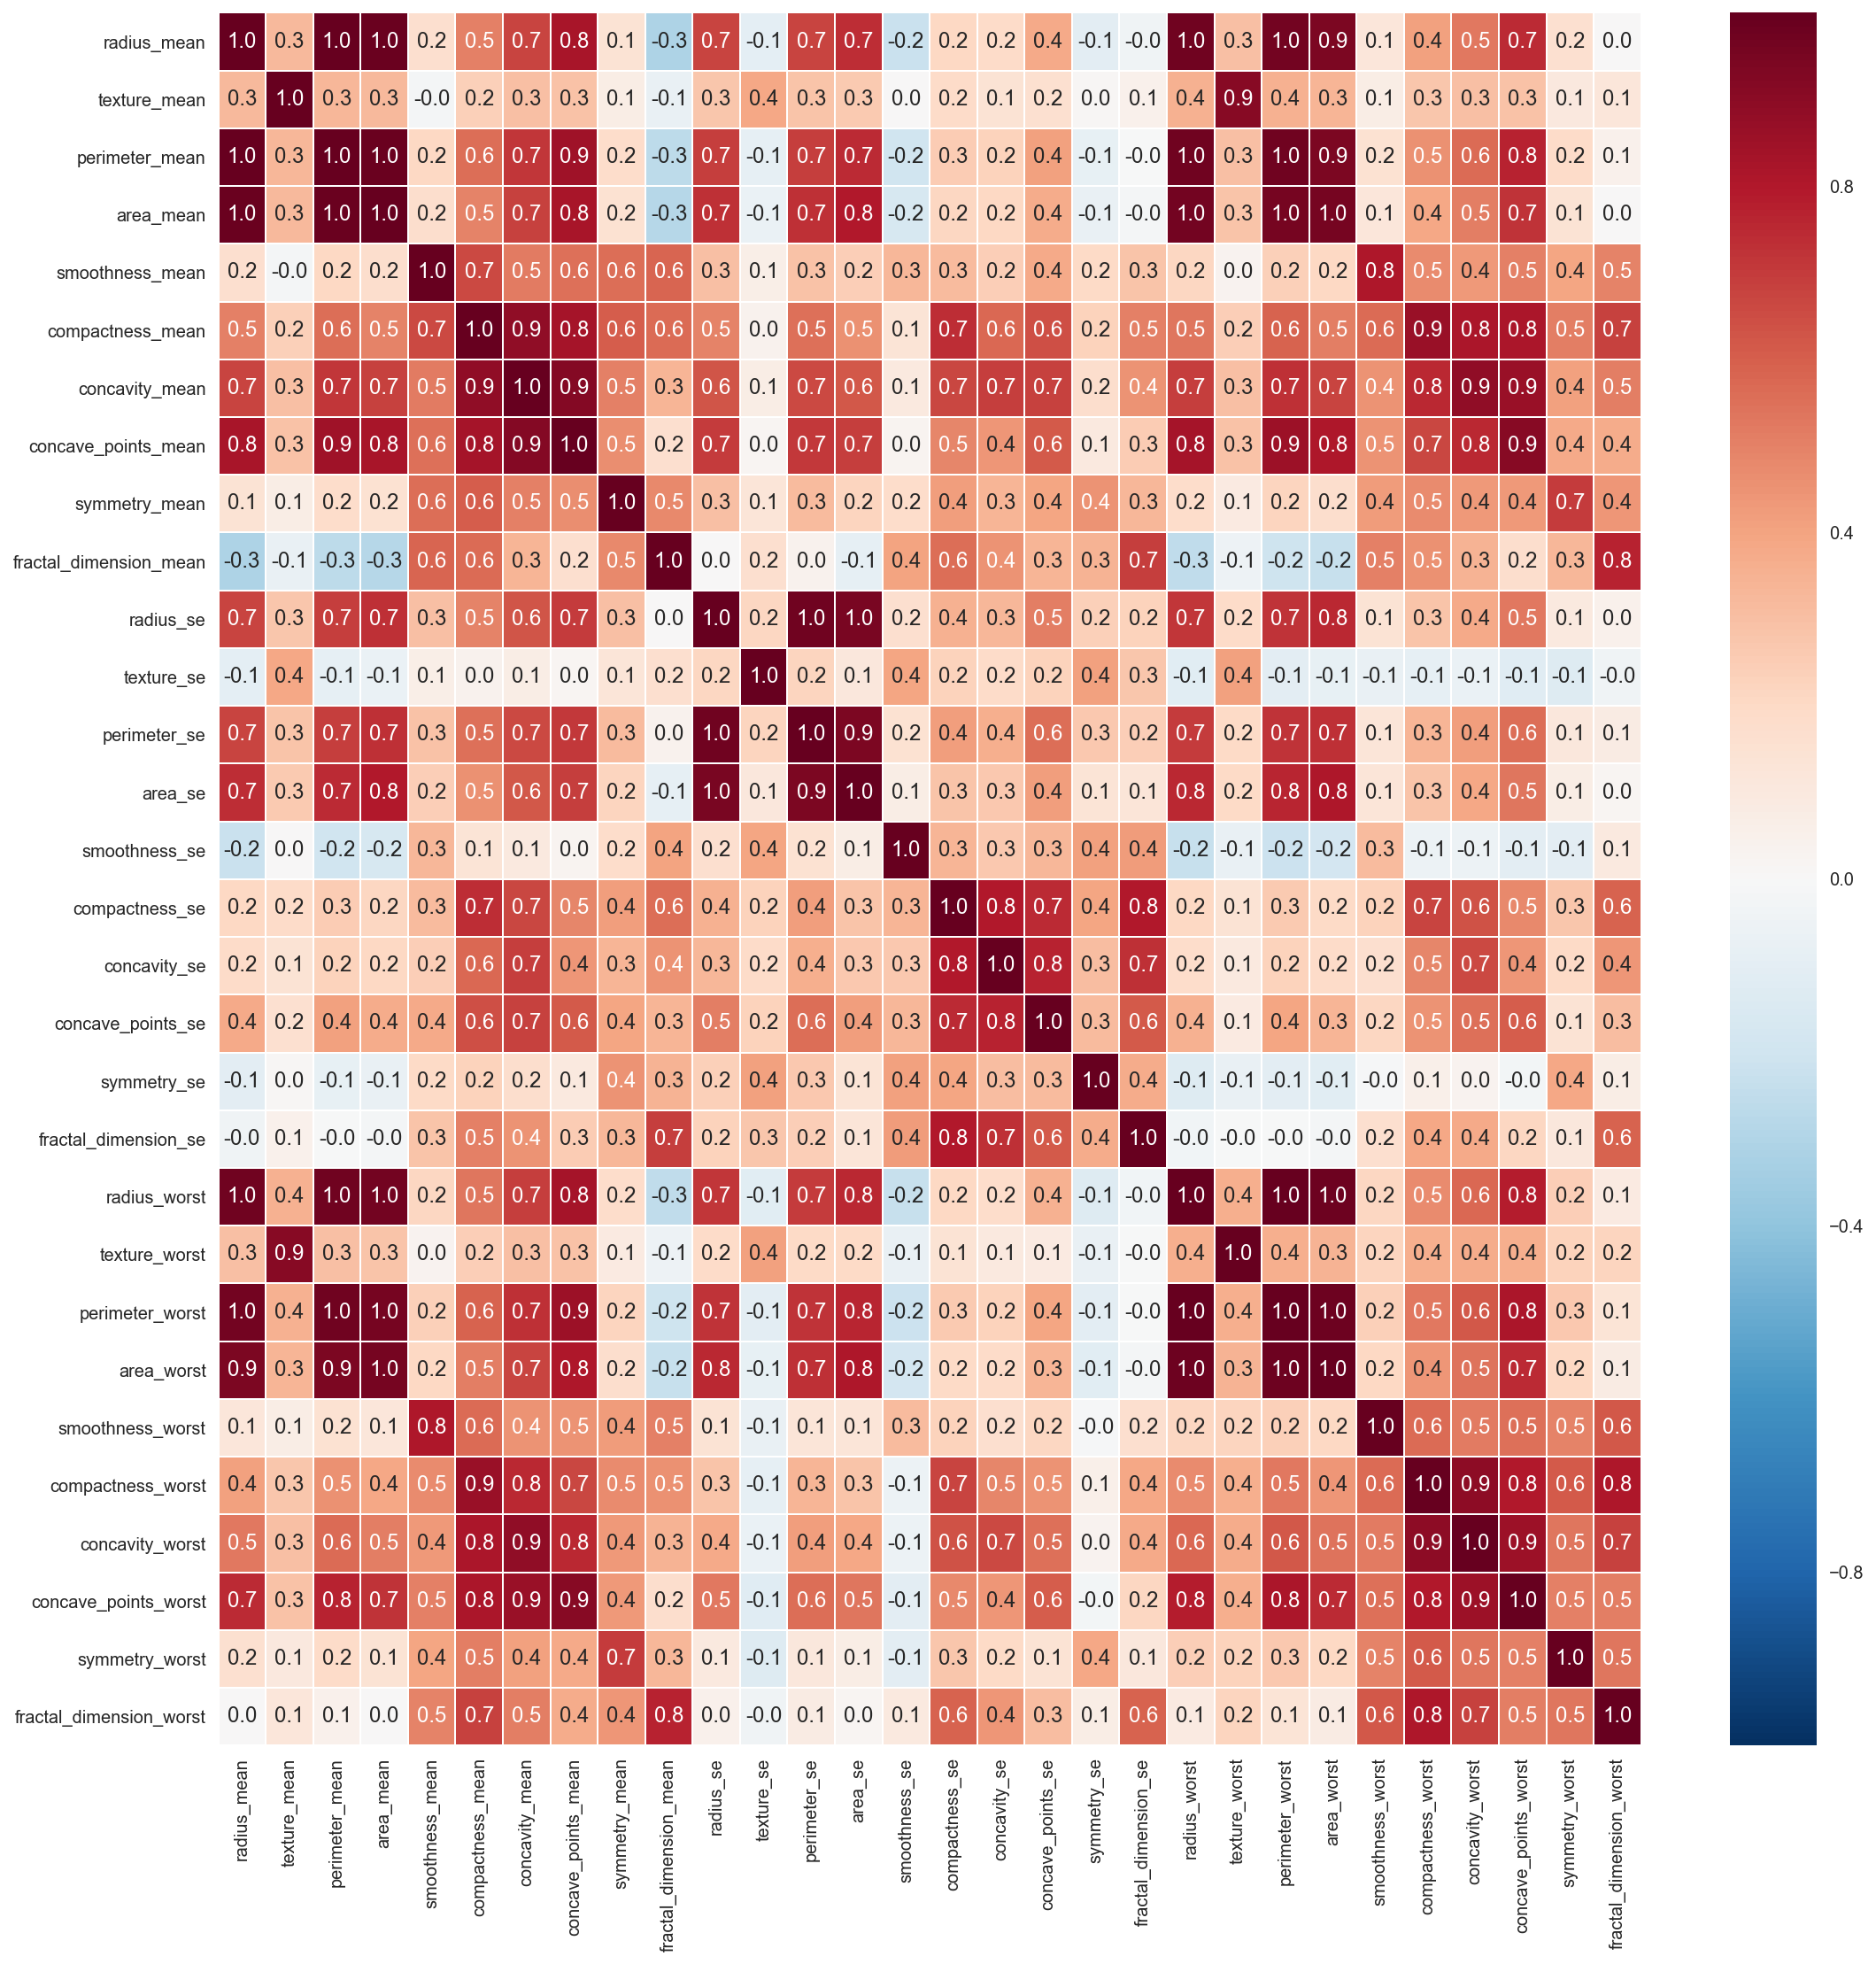

In [24]:
#correlation map
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax);

Well, finaly we are in the pub and lets choose our drinks at feature selection part while using heatmap (correlation matrix).

## Feature Selection and Random Forest Classification

Today our purpose is to try new cocktails. For example, we are finaly in the pub and we want to drink different tastes. Therefore, we need to compare ingredients of drinks. If one of them includes lemon, after drinking it we need to eliminate other drinks which includes lemon so as to experience very different tastes.

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict.

### Feature selection with correlation and random forest classification

As it can be seen in the heatmap that **radius_mean**, **perimeter_mean** and **area_mean** are correlated with each other so we will use only **area_mean**. If you ask how we choose **area_mean** as a feature to use, well actually there is no correct answer, we just look at strip plots and **area_mean** looks like to have clear seggregation between classes  but we cannot make exact separation among other correlated features without trying. So let's find other correlated features and look at accuracy with random forest classifier.

**compactness_mean**, **concavity_mean** and **concave_points_mean** are correlated with each other.Therefore we only choose **concavity_mean**. Apart from these, **radius_se**, **perimeter_se** and **area_se** are correlated and we only use **area_se**. **radius_worst**, **perimeter_worst** and **area_worst** are correlated so we use **area_worst**. **compactness_worst**, **concavity_worst** and **concave_points_worst** so we use **concavity_worst** as feature. **compactness_se**, **concavity_se** and **concave_points_se** are correlated so we use concavity_se. **texture_mean** and **texture_worst** are correlated and we use **texture_mean**. **area_worst** and **area_mean** are correlated, we use **area_mean**.

In [25]:
drop_cols = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_se',
             'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave_points_worst',
             'compactness_se','concave_points_se','texture_worst','area_worst']
X_uncorr = X.drop(drop_cols, axis = 1 )        # do not modify x, we will use it later 
X_uncorr.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After dropping correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, we know and we see that there is a correlation value 0.9 but let's see together what happens if we do not drop it.

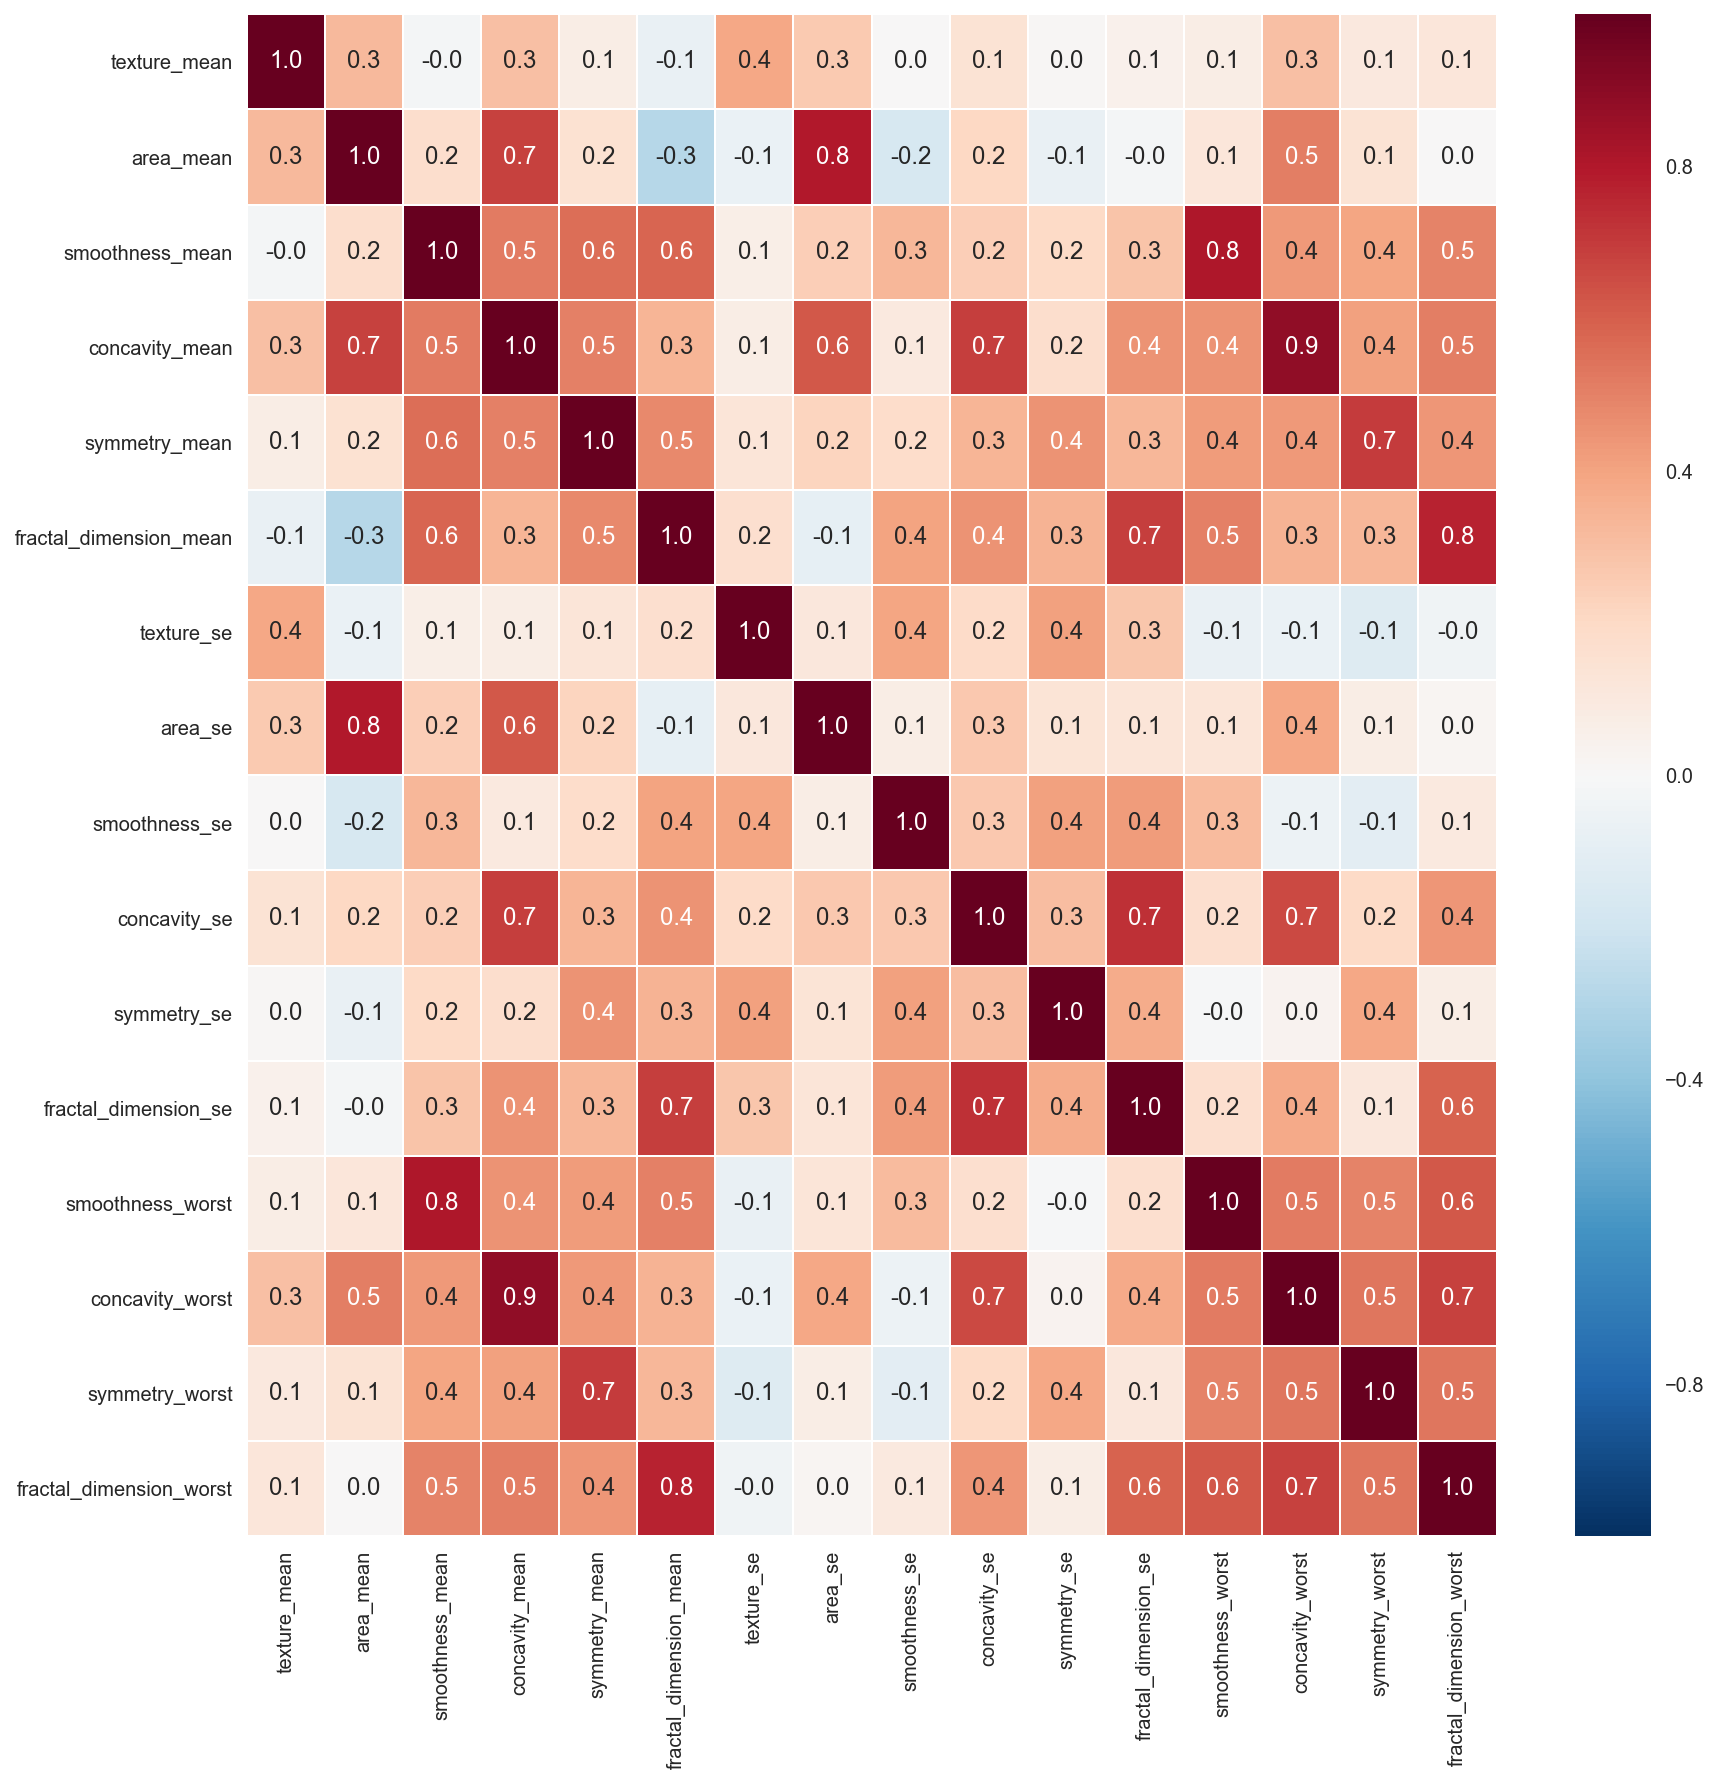

In [26]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_uncorr.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax);

Well, we choose our features but did we choose correctly ? Let's use random forest and find accuracy according to chosen features.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X_uncorr, y, test_size=0.3, random_state=random_state)

In [28]:
#random forest classifier with n_estimators=10 (default)
clf_rf_1 = RandomForestClassifier(random_state=random_state)      
clr_rf_1 = clf_rf_1.fit(X_train, y_train)

In [29]:
ac = accuracy_score(y_test, clf_rf_1.predict(X_test))
print('Accuracy is: ',ac)

Accuracy is:  0.959064327485


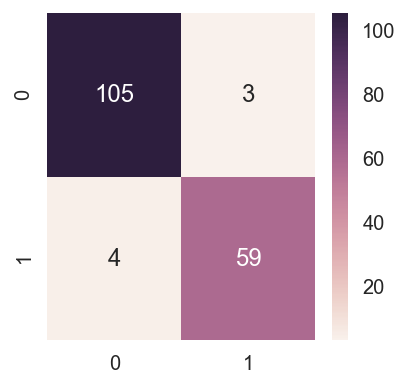

In [30]:
cm = confusion_matrix(y_test, clf_rf_1.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d");

Accuracy is almost 95% and as it can be seen in the confusion matrix, we make few wrong prediction. Now let's see other feature selection methods to find better results.

### Univariate Feature Selection and Random Forest classification

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. We do not try all combinations but we only choose k = 5 and find best 5 features.

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [32]:
feature_score_df = pd.DataFrame({'Feature': X_train.columns, 'Score': select_feature.scores_})
feature_score_df.sort_values(by='Score', ascending=False, inplace=True)
feature_score_df

,Feature,Score
1,area_mean,36689.955660
7,area_se,6127.410670
0,texture_mean,60.691643
13,concavity_worst,25.885812
3,concavity_mean,13.054765
14,symmetry_worst,1.006351
9,concavity_se,0.692897
12,smoothness_worst,0.263226
4,symmetry_mean,0.195983
15,fractal_dimension_worst,0.123087


Best 5 feature to classify is that **area_mean**, **area_se**, **texture_mean**, **concavity_worst** and **concavity_mean**. So let's se what happens if we use only these best scored 5 feature.

In [33]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)

In [34]:
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train_2, y_train)

In [35]:
accu_2 = accuracy_score(y_test, clf_rf_2.predict(X_test_2))
print('Accuracy is: ', accu_2)

Accuracy is:  0.959064327485


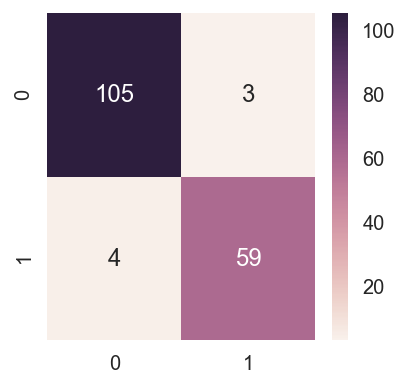

In [36]:
cm_2 = confusion_matrix(y_test, clf_rf_2.predict(X_test_2))
plt.figure(figsize=(3,3))
sns.heatmap(cm_2,annot=True,fmt="d");

Accuracy is almost 96% and as it can be seen in the confusion matrix, we make few wrong predictions as well. What we did up to now is that we chose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar. Now let's see other feature selection methods to find better results.

### Recursive Feature Elimination (RFE) with Random Forest

Feature ranking with recursive feature elimination. Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. 

Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest (based on `feature_importances_` attribute of the random forest model) are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method intstead of SelectKBest.

In [37]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1) # step=1: eliminate one feature at a time
rfe = rfe.fit(X_train, y_train)

In [38]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False], dtype=bool)

In [39]:
print('Chosen best 5 feature by rfe:', X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


In [40]:
feature_ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})
feature_ranking_df.sort_values(by='Ranking', ascending=True, inplace=True)
feature_ranking_df

,Feature,Ranking
0,texture_mean,1
1,area_mean,1
3,concavity_mean,1
7,area_se,1
13,concavity_worst,1
14,symmetry_worst,2
12,smoothness_worst,3
15,fractal_dimension_worst,4
5,fractal_dimension_mean,5
9,concavity_se,6


Chosen 5 best features by rfe is **texture_mean**, **area_mean**, **concavity_mean**, **area_se**, **concavity_worst**. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Precisely, we can say that we make good feature selection with rfe and selectkBest methods. However as we can see there is a problem. Although we did find best 5 features with two different method and these features are same but why it is 5. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore let's see how many feature we need to use with rfecv method.

### Recursive Feature Elimination with Cross Validation and Random Forest classification

Feature ranking with recursive feature elimination and cross validation. Now we will not only find best features but we also find how many features do we need for best accuracy. We do not provide the number of features to select anymore as with RFE. Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination with corss validation (RFECV) is to select features by recursively considering smaller and smaller sets of features and validated via cross validation. The importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute of the given estimator. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. 

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [41]:
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

In [42]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


Finally, we find best 12 features out of 16 features, those are **texture_mean**, **area_mean**, **concavity_mean**, **texture_se**, **area_se**, **concavity_se**, **symmetry_se**, **smoothness_worst**, **concavity_worst**, **symmetry_worst** and **fractal_dimension_worst** for best classification. 

Let's look at best accuracy with plot.

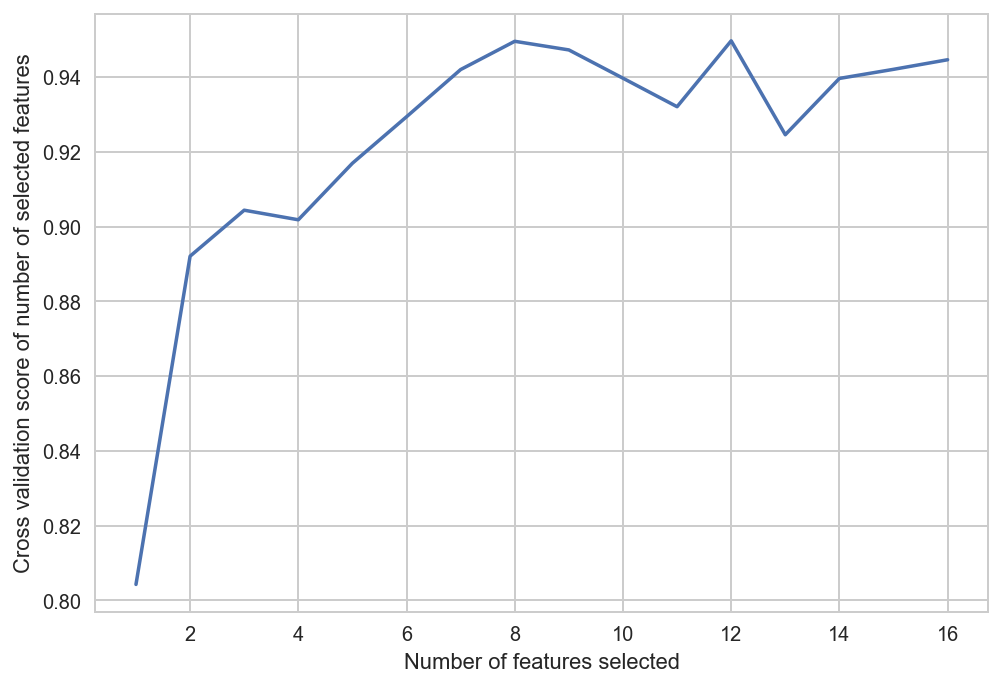

In [43]:
# Plot number of features vs cross-validation scores
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);

In [44]:
accu_4 = accuracy_score(y_test, rfecv.predict(X_test))
print('Accuracy is: ', accu_4)

Accuracy is:  0.959064327485


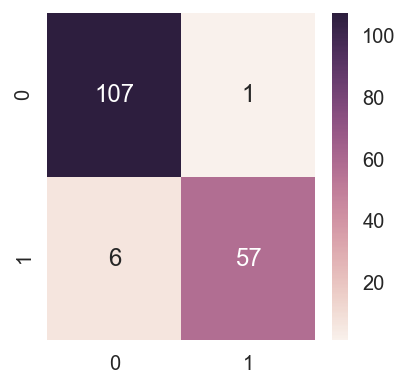

In [45]:
cm_4 = confusion_matrix(y_test, rfecv.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm_4, annot=True, fmt="d");

Let's look at what we did up to this point. Let's accept that this data is very easy for classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning **how to make feature selection and understanding data**. Then last make our last feature selection method.

### Tree Based Feature Selection and Random Forest classification

Random Forest classifier has a **`featureimportances`** attribute that signifies the importance of features (the higher, the more important the feature is).!!! **To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

In [46]:
clf_rf_5 = RandomForestClassifier(random_state=random_state)      
clr_rf_5 = clf_rf_5.fit(X_train, y_train)

In [47]:
feature_importances = clr_rf_5.feature_importances_
feature_importances

array([ 0.05546573,  0.27603662,  0.03002212,  0.13824564,  0.00577129,
        0.0149298 ,  0.01276787,  0.15062328,  0.00988511,  0.01108534,
        0.0152418 ,  0.01005561,  0.07102044,  0.14792279,  0.03927939,
        0.01164718])

In [48]:
sorted_feature_indices = np.argsort(feature_importances)[::-1]

In [49]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns[sorted_feature_indices], 
                                      'Importance': feature_importances[sorted_feature_indices]})
feature_importance_df

,Feature,Importance
0,area_mean,0.276037
1,area_se,0.150623
2,concavity_worst,0.147923
3,concavity_mean,0.138246
4,smoothness_worst,0.071020
5,texture_mean,0.055466
6,symmetry_worst,0.039279
7,smoothness_mean,0.030022
8,symmetry_se,0.015242
9,fractal_dimension_mean,0.014930


In [50]:
std_error = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_], axis=0)

In [51]:
std_error

array([ 0.09194215,  0.23839287,  0.0729855 ,  0.20639699,  0.00548658,
        0.01675472,  0.01737135,  0.18582821,  0.01456378,  0.01619128,
        0.01799115,  0.01002121,  0.05739593,  0.18185566,  0.04127819,
        0.01506854])

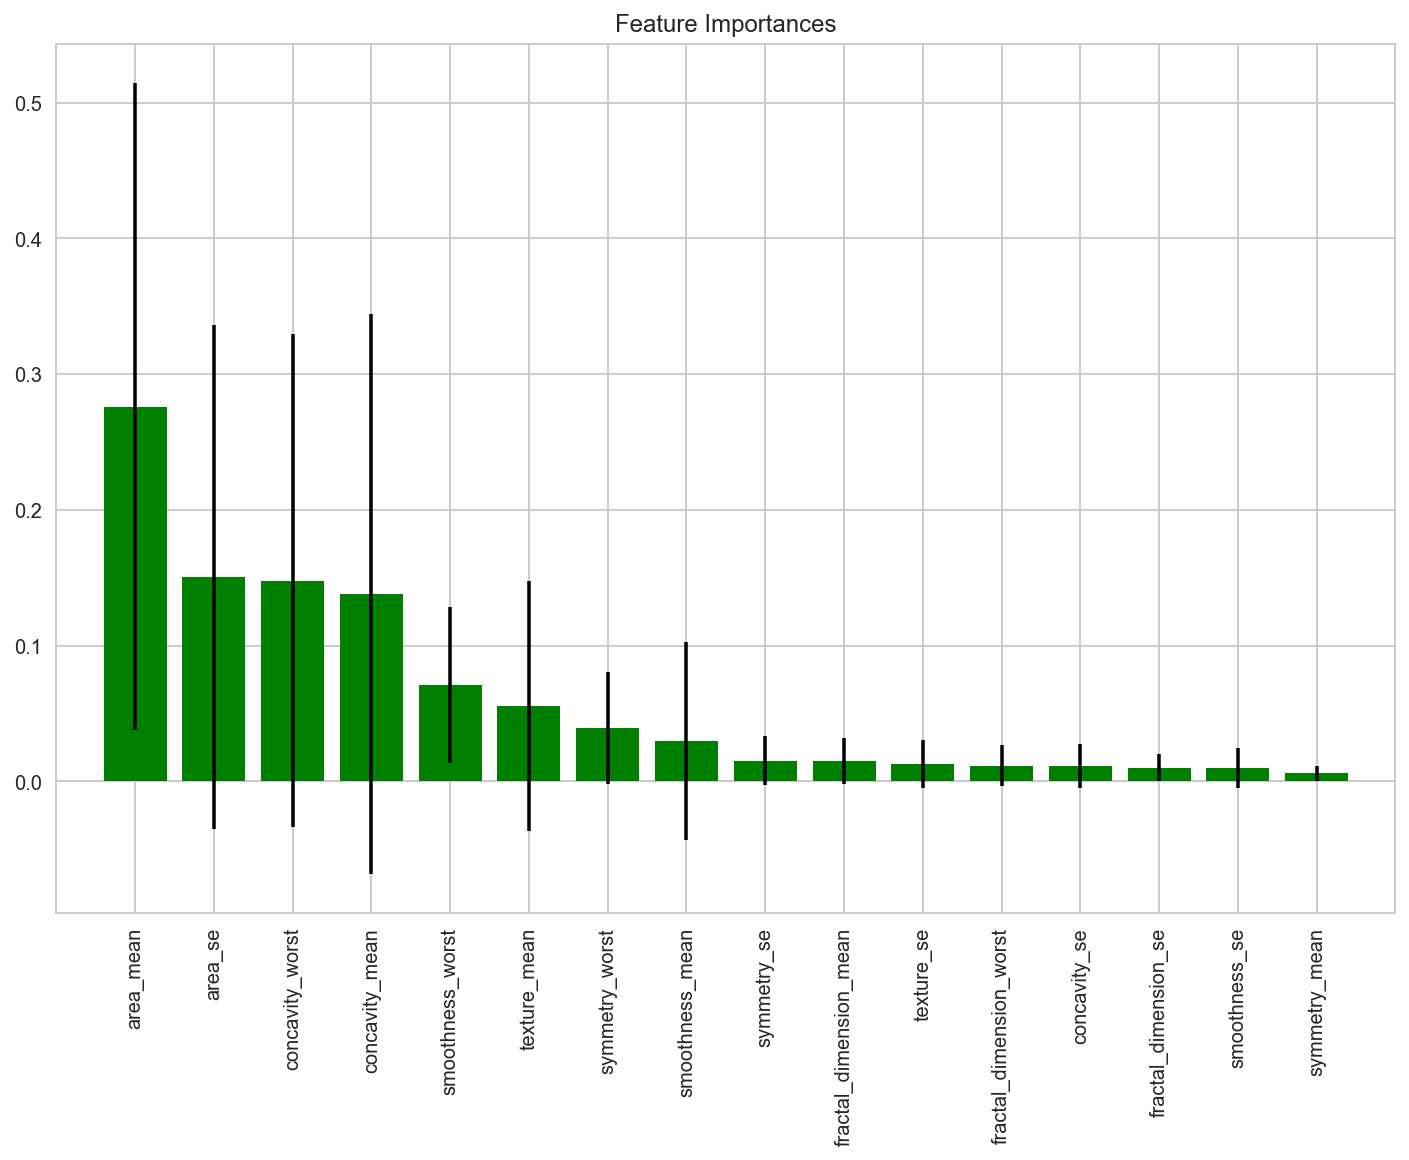

In [52]:
# Plot the feature importances of the forest
plt.figure(1, figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_feature_indices], color="g",
        yerr=std_error[sorted_feature_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_feature_indices],rotation=90)
plt.xlim([-1, X_train.shape[1]]);

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features.

## Feature Extraction

### Feature Extraction using PCA

We will use principle component analysis (PCA) for feature extraction. 

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

From the pair plots in exploratory analysis section above, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and retain as much information as possible when working with only 2 dimensions. We will use PCA.

Remember, PCA can be applied only on numerical data. Therefore, if the data has categorical variables they must be converted to numerical. Also, make sure we have done the basic data cleaning prior to implementing this technique. The directions of the components are identified in an unsupervised way i.e. the response variable(Y) is not used to determine the component direction. Therefore, it is an unsupervised approach and hence response variable must be removed.

Note that the PCA directions are highly sensitive to data scaling, and most likely we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features. Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [54]:
scaled_df = pd.concat([pd.DataFrame(X_std, columns=X.columns), y], axis=1)

In [55]:
scaled_df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,-0.321304,-0.289258,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802,M
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,0.155410,0.298627,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730,M
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.490051,0.233722,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435,M
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650,M
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,-0.409420,-0.360764,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856,M


In [56]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

In [57]:
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
PCA_df['PCA_3'] = X_pca[:,2]
PCA_df.head(5)

,PCA_1,PCA_2,PCA_3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767


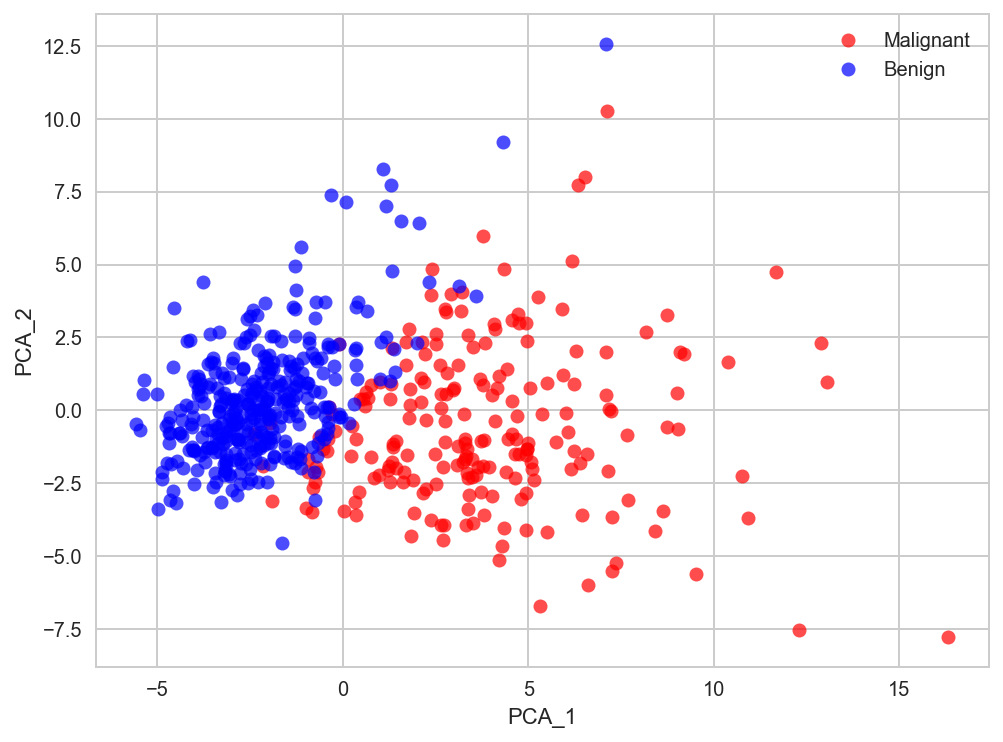

In [58]:
plt.figure(figsize=(8,6))
plt.plot(PCA_df['PCA_1'][cancer_df['diagnosis'] == 'M'],PCA_df['PCA_2'][cancer_df['diagnosis'] == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][cancer_df['diagnosis'] == 'B'],PCA_df['PCA_2'][cancer_df['diagnosis'] == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [59]:
# The amount of variance that each PC explains
var_exp = pca.explained_variance_ratio_
var_exp

array([ 0.44272026,  0.18971182,  0.09393163,  0.06602135,  0.05495768,
        0.04024522,  0.02250734,  0.01588724,  0.01389649,  0.01168978])

In [60]:
# Cumulative Variance explains
cum_var_exp = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))
cum_var_exp

array([ 0.4427,  0.6324,  0.7263,  0.7923,  0.8473,  0.8875,  0.91  ,
        0.9259,  0.9398,  0.9515])

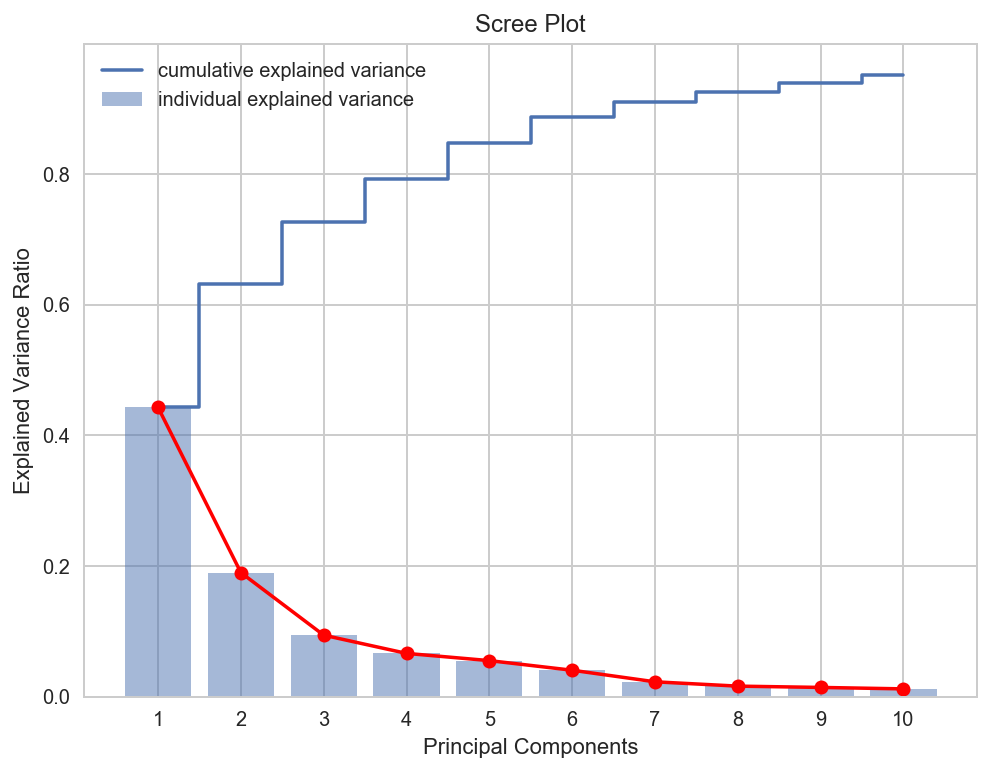

In [61]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.components_) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(pca.components_) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.plot(range(1, len(pca.components_) + 1), var_exp, 'ro-')
plt.xticks(range(1, len(pca.components_) + 1))
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.legend(loc='best');

The most obvious change in slope in the scree plot occurs at component 2, which is the `"elbow"` of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first 3 components should be retained.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.pipeline import Pipeline

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [63]:
# Make Random Forest Classifier Pipeline
pipe_rf = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=3)),
                     ('clf', RandomForestClassifier(random_state=random_state))])

# Fit Pipeline to training Data
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])

In [64]:
accu = accuracy_score(y_test, pipe_rf.predict(X_test))
print('Accuracy is: ', accu)

Accuracy is:  0.947368421053


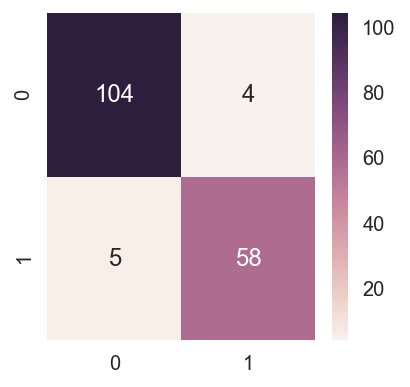

In [65]:
cm = confusion_matrix(y_test, pipe_rf.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d");

Accuracy is almost 94.74% and as it can be seen in the confusion matrix, we make few wrong predictions as well. Also point to note here is that we achieved this accuracy just by considering only 3 PCA components instead of all 16 features in the data set.

### Feature Extraction using t-SNE

t-distributed Stochastic Neighbor Embedding (t-SNE) is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

The intuitive idea of t-SNE is to map the high-dimensional points into a lower dimension such that it preserves the local structure, which means that the nearest neighbors of one point in the high-dimensional space should also be the same nearest neighbor of that point in the low-dimensional space.

In [66]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=35, learning_rate=100, random_state=random_state)
X_tsne = model.fit_transform(X_std)

In [67]:
TSNE_df = pd.DataFrame()
TSNE_df['TSNE_1'] = X_tsne[:,0]
TSNE_df['TSNE_2'] = X_tsne[:,1]
TSNE_df.head(5)

,TSNE_1,TSNE_2
0,4.403436,4.494004
1,6.052752,0.426451
2,5.392569,2.998728
3,-1.669522,-7.899012
4,7.552663,1.765008


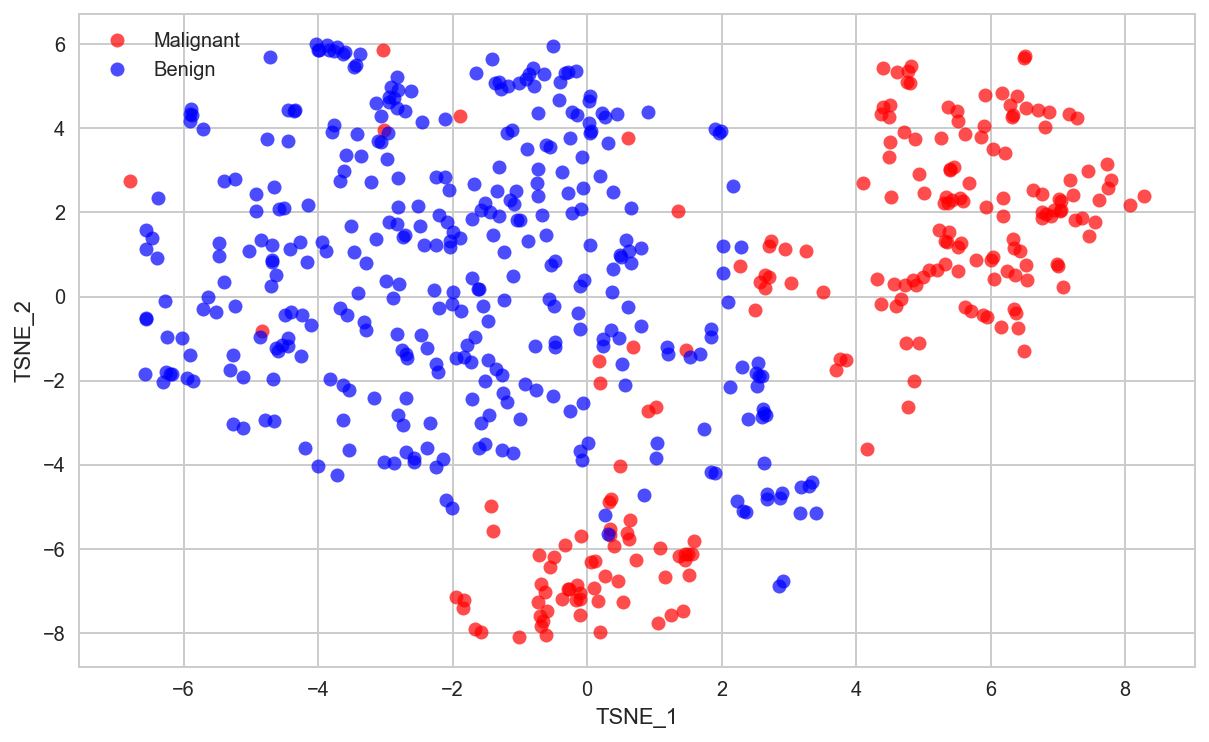

In [68]:
plt.figure(figsize=(10,6))
plt.plot(TSNE_df['TSNE_1'][cancer_df['diagnosis'] == 'M'],TSNE_df['TSNE_2'][cancer_df['diagnosis'] == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(TSNE_df['TSNE_1'][cancer_df['diagnosis'] == 'B'],TSNE_df['TSNE_2'][cancer_df['diagnosis'] == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.legend(['Malignant','Benign'])
plt.show()